## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [4]:
print('Training independent variables')
print (x_train.shape)
print('Training target data')
print(y_train.shape)
print('Test independent variables')
print (x_test.shape)
print('Test target data')
print(y_test.shape)

Training independent variables
(60000, 28, 28)
Training target data
(60000,)
Test independent variables
(10000, 28, 28)
Test target data
(10000,)


In [5]:
print(y_train)

[9 0 0 ... 3 0 5]


In [6]:
import numpy as np
np.random.seed(110) 
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

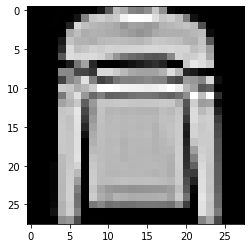

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[5,:,:],cmap='gray')

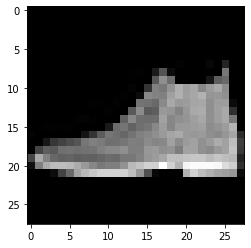

In [8]:
plt.imshow(x_test[0,:,:],cmap='gray')

### Find dimensions of an image in the dataset

In [9]:
print ('Shape of x_train is 60000*28*28 \nSo there are 60000 samples of pixels 28*28, hence dimension is 28*28')

Shape of x_train is 60000*28*28 
So there are 60000 samples of pixels 28*28, hence dimension is 28*28


In [10]:
import pandas as pd
L=pd.DataFrame(y_train)
L[0].value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: 0, dtype: int64

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [11]:
from keras.utils import np_utils
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)
y_train[2]


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/= 255
x_test/= 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [13]:
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
x_test = x_test.reshape(x_test.shape[0],28, 28,1)
x_train.shape

(60000, 28, 28, 1)

### Import the necessary layers from keras to build the model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.callbacks import EarlyStopping

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [15]:
model=Sequential()
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, (3, 3), activation='relu'))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model.fit(x_train,y_train,batch_size=32,nb_epoch=10,verbose=1,callbacks=[es])
score = model.evaluate(x_test, y_test, verbose=0)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # This is added back by InteractiveShellApp.init_path()




Epoch 1/10





60000/60000 [==============================] - 24s 397us/step - loss: 0.3718 - acc: 0.8662
Epoch 2/10
 1024/60000 [..............................] - ETA: 9s - loss: 0.2471 - acc: 0.9092

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:842: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


60000/60000 [==============================] - 10s 159us/step - loss: 0.2255 - acc: 0.9163
Epoch 3/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.1601 - acc: 0.9397
Epoch 4/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.1090 - acc: 0.9596
Epoch 5/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.0735 - acc: 0.9727
Epoch 6/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.0481 - acc: 0.9828
Epoch 7/10
60000/60000 [==============================] - 10s 159us/step - loss: 0.0342 - acc: 0.9877
Epoch 8/10
60000/60000 [==============================] - 10s 159us/step - loss: 0.0245 - acc: 0.9914
Epoch 9/10
60000/60000 [==============================] - 10s 159us/step - loss: 0.0213 - acc: 0.9922
Epoch 10/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.0179 - acc: 0.9933


### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [16]:
model=Sequential()
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
es=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
model.fit(x_train,y_train,batch_size=32,nb_epoch=25,verbose=1,callbacks=[es])
score = model.evaluate(x_test, y_test, verbose=0)



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if sys.path[0] == '':


Epoch 1/25
60000/60000 [==============================] - 10s 164us/step - loss: 0.3877 - acc: 0.8601
Epoch 2/25
 1024/60000 [..............................] - ETA: 9s - loss: 0.2891 - acc: 0.9043 

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:842: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


60000/60000 [==============================] - 9s 156us/step - loss: 0.2572 - acc: 0.9049
Epoch 3/25
60000/60000 [==============================] - 9s 156us/step - loss: 0.2112 - acc: 0.9209
Epoch 4/25
60000/60000 [==============================] - 9s 156us/step - loss: 0.1766 - acc: 0.9347
Epoch 5/25
60000/60000 [==============================] - 9s 156us/step - loss: 0.1500 - acc: 0.9438
Epoch 6/25
60000/60000 [==============================] - 10s 164us/step - loss: 0.1267 - acc: 0.9520
Epoch 7/25
60000/60000 [==============================] - 10s 160us/step - loss: 0.1069 - acc: 0.9598
Epoch 8/25
60000/60000 [==============================] - 9s 155us/step - loss: 0.0900 - acc: 0.9661
Epoch 9/25
60000/60000 [==============================] - 9s 156us/step - loss: 0.0804 - acc: 0.9705
Epoch 10/25
60000/60000 [==============================] - 9s 156us/step - loss: 0.0701 - acc: 0.9739
Epoch 11/25
60000/60000 [==============================] - 9s 157us/step - loss: 0.0612 - acc: 0.97

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=90,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images

datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

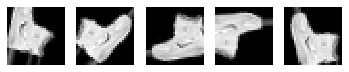

In [18]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [19]:
model.fit_generator(datagen.flow(x_train, y_train,batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=10,
                    validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/10
  16/1875 [..............................] - ETA: 22s - loss: 6.5964 - acc: 0.1680

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=10)`
  after removing the cwd from sys.path.


1875/1875 [==============================] - 23s 12ms/step - loss: 1.6768 - acc: 0.3825 - val_loss: 1.1336 - val_acc: 0.5875
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 1.2836 - acc: 0.5348 - val_loss: 1.1658 - val_acc: 0.5659
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 1.1718 - acc: 0.5773 - val_loss: 1.0773 - val_acc: 0.6203
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 1.0912 - acc: 0.6074 - val_loss: 1.0194 - val_acc: 0.6468
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 1.0405 - acc: 0.6260 - val_loss: 0.9921 - val_acc: 0.6475
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 1.0052 - acc: 0.6383 - val_loss: 1.0076 - val_acc: 0.6560
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.9675 - acc: 0.6530 - val_loss: 1.0717 - val_acc: 0.6324
Epoch 8/10
1875/1875 [==============================] - 23s

###  Report the final train and validation accuracy

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)

In [21]:
print(score)

[0.8893128662109375, 0.709]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:

datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=90,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

### **Load CIFAR10 dataset**

In [23]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [24]:
print('Training independent variables')
print (x_train.shape)
print('Training target data')
print(y_train.shape)
print('Test independent variables')
print (x_test.shape)
print('Test target data')
print(y_test.shape)

Training independent variables
(50000, 32, 32, 3)
Training target data
(50000, 1)
Test independent variables
(10000, 32, 32, 3)
Test target data
(10000, 1)


In [25]:
x_train.dtype

dtype('uint8')

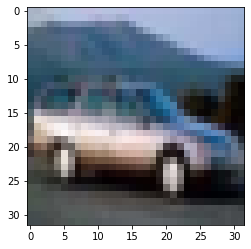

In [26]:
import matplotlib.pyplot as plt
plt.imshow(x_train[4,:,:],cmap='gray')

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
import keras
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
#save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model'



### **Prepare/fit the generator.**

In [32]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



50000 train samples
10000 test samples


### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


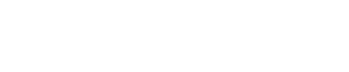

In [34]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:3], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()